<a href="https://colab.research.google.com/github/dhdessoldi/PCA_ESG_Bitcoin/blob/main/PCA_TCC_REGRESSAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca pandas e o conjunto de dados


In [ ]:
import pandas as pd

In [ ]:
dados_esg = pd.read_csv('/content/Tabela_Regressao.csv')

In [ ]:
dados_esg

,country,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,Africa do Sul,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,Alemanha,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,Australia,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,Austria,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,Belgica,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,Brasil,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,Bulgaria,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,Canada,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,China,33,2374357090,6122247000,0.582320,0.078,3337340000,0.788,0.774827
9,Coreia do Sul,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160


In [ ]:
dados_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         29 non-null     object 
 1   nodes                           29 non-null     int64  
 2   emission_co2                    29 non-null     int64  
 3   fossil_fuel_generation_tWh      29 non-null     int64  
 4   emission_intensity_co2_per_kwh  29 non-null     float64
 5   eletricity_cost                 29 non-null     float64
 6   renewables_nuclear_generation   29 non-null     int64  
 7   IDH                             29 non-null     float64
 8   internet_access                 29 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.2+ KB


Criando matriz de correlação a partir das variáveis numéricas

In [ ]:
num_var = dados_esg.drop(['country'], axis=1)

In [ ]:
num_var

,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,33,2374357090,6122247000,0.582320,0.078,3337340000,0.788,0.774827
9,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160


In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

In [ ]:
pg.rcorr(num_var,
         method = 'pearson', upper = 'pval',
         decimals = 4,
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})


,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
nodes,-,,,,,*,,
emission_co2,0.1813,-,***,,*,***,,*
fossil_fuel_generation_tWh,0.2347,0.9858,-,*,,***,,*
emission_intensity_co2_per_kwh,-0.0118,0.2908,0.3136,-,,,,**
eletricity_cost,0.0324,-0.3498,-0.2936,-0.2153,-,*,***,
renewables_nuclear_generation,0.3351,0.9584,0.9693,0.1941,-0.3153,-,,
IDH,0.214,-0.2846,-0.2437,-0.2789,0.5215,-0.24,-,***
internet_access,0.2294,-0.3267,-0.3207,-0.3768,0.2977,-0.2882,0.8661,-


In [ ]:
!pip install statstests

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statstests.process import stepwise

In [ ]:
num_columns = num_var.columns
num_columns

Index(['nodes', 'emission_co2', 'fossil_fuel_generation_tWh',
       'emission_intensity_co2_per_kwh', 'eletricity_cost',
       'renewables_nuclear_generation', 'IDH', 'internet_access'],
      dtype='object')

In [ ]:
regression_data = pd.DataFrame(num_var, columns=num_columns)
regression_data

,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,33,2374357090,6122247000,0.582320,0.078,3337340000,0.788,0.774827
9,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160


In [ ]:
x = regression_data[['emission_co2','fossil_fuel_generation_tWh','emission_intensity_co2_per_kwh','eletricity_cost','renewables_nuclear_generation','IDH','internet_access']]

y = regression_data[['nodes']]

In [ ]:
x = sm.add_constant(x)

In [ ]:
model =smf.ols('nodes ~ emission_co2 + fossil_fuel_generation_tWh + emission_intensity_co2_per_kwh + eletricity_cost + renewables_nuclear_generation + IDH + internet_access', data=regression_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nodes   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2.562
Date:                Thu, 28 Aug 2025   Prob (F-statistic):             0.0448
Time:                        19:14:15   Log-Likelihood:                -207.77
No. Observations:                  29   AIC:                             431.5
Df Residuals:                      21   BIC:                             442.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2047.3304   1116.491     -1.834      0.081   -4369.200     274.539
emission_co2                   -1.656e-06   1.04e-06     -1.593      0.126   -3.82e-06    5.06e-07
fossil_fuel_generation_tWh     -4.385e-08      5e-07     -0.088      0.931   -1.08e-06    9.95e-07
emission_intensity_co2_per_kwh   524.4073    432.970      1.211      0.239    -376.003    1424.817
eletricity_cost                  287.0293    862.653      0.333      0.743   -1506.955    2081.014
renewables_nuclear_generation   1.409e-06   4.93e-07      2.857      0.009    3.84e-07    2.43e-06
IDH                             -857.7228   2494.158     -0.344      0.734   -6044.609    4329.163
internet_access                 2902.0071   2497.039      1.162      0.258   -2290.870    8094.884
==============================================================================
Omnibus:                       11.881   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.031
Skew:                           1.231   Prob(JB):                      0.00402
Kurtosis:                       4.753   Cond. No.                     7.65e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
step_model = stepwise(model, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('fossil_fuel_generation_tWh') + Q('emission_intensity_co2_per_kwh') + Q('eletricity_cost') + Q('renewables_nuclear_generation') + Q('IDH') + Q('internet_access')

 Discarding atribute "Q('fossil_fuel_generation_tWh')" with p-value equal to 0.930894894739027 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('emission_intensity_co2_per_kwh') + Q('eletricity_cost') + Q('renewables_nuclear_generation') + Q('IDH') + Q('internet_access')

 Discarding atribute "Q('eletricity_cost')" with p-value equal to 0.7452866667732205 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('emission_intensity_co2_per_kwh') + Q('renewables_nuclear_generation') + Q('IDH') + Q('internet_access')

 Discarding atribute "Q('IDH')" with p-value equal to 0.8062933977815623 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('emission_intensity_co2_per_kwh') + Q('renewables_nuclear_generation') + Q('internet_access')

 Discarding a

In [ ]:
tabela_fitted = pd.DataFrame({'paises': dados_esg['country'],
                              'nos_reais': dados_esg['nodes'],
                              'nos_pred': step_model.fittedvalues})

In [ ]:
tabela_fitted

,paises,nos_reais,nos_pred
0,Africa do Sul,30,8.527230
1,Alemanha,1220,265.909102
2,Australia,130,95.562143
3,Austria,66,127.789107
4,Belgica,34,132.196792
5,Brasil,73,752.529683
6,Bulgaria,31,94.163019
7,Canada,362,575.553944
8,China,33,441.240094
9,Coreia do Sul,82,204.693029


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

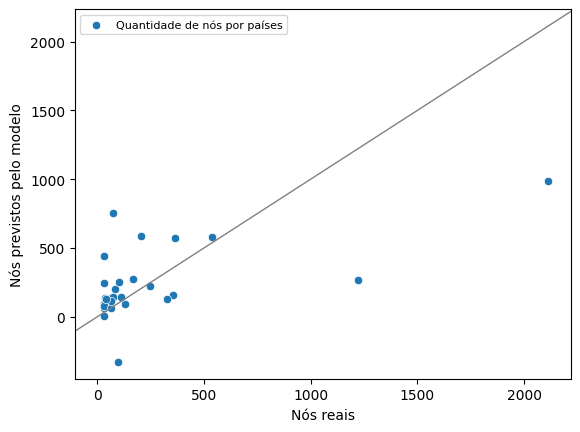

In [ ]:
sns.scatterplot(tabela_fitted, x='nos_reais', y='nos_pred')
plt.xlabel('Nós reais', fontsize=10)
plt.ylabel('Nós previstos pelo modelo', fontsize=10)
plt.axline((0, 0), (max(dados_esg['nodes']), max(dados_esg['nodes'])), linewidth=1, color='grey')
plt.legend(labels=['Quantidade de nós por países'], fontsize=8)
plt.show()

In [ ]:
sm.stats.anova_lm(step_model)

,df,sum_sq,mean_sq,F,PR(>F)
Q('emission_co2'),1.0,1.728707e+05,1.728707e+05,1.319801,0.261087
Q('renewables_nuclear_generation'),1.0,1.680787e+06,1.680787e+06,12.832161,0.001376
Residual,26.0,3.405541e+06,1.309824e+05,NaN,NaN


In [ ]:
!pip install factor_analyzer

### Realizando o teste de esfericidade de Bartlett

O teste de esfericidade de Bartlett consiste em comparar a matriz de correlações ρ com uma matriz identidade **I** de mesma dimensão. Se as diferenças entre os valores correspondentes fora da diagonal principal de cada matriz não forem estatisticamente diferentes de 0, a determinado nível de significância, poderemos considerar que a extração dos fatores não será adequada.

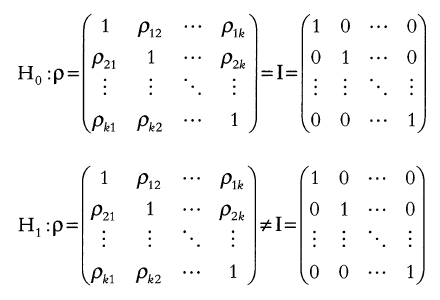

**Obs**: Deve ser sempre preferido o teste de esfericidade de Bartlett à estatística KMO para efeitos de decisão sobre a adequação global da análise fatorial, visto que, enquanto o primeiro é um teste com determinado nível de significância, o segundo é apenas um coeficiente (estatística) calculado sem
distribuição de probabilidades determinada e hipóteses que permitam avaliar o nível correspondente de significância para efeitos de decisão.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
num_var = dados_esg.drop(['country','nodes'], axis=1)
num_var.corr()

,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
emission_co2,1.000000,0.985779,0.290761,-0.349840,0.958399,-0.284644,-0.326666
fossil_fuel_generation_tWh,0.985779,1.000000,0.313572,-0.293630,0.969323,-0.243688,-0.320659
emission_intensity_co2_per_kwh,0.290761,0.313572,1.000000,-0.215341,0.194094,-0.278872,-0.376822
eletricity_cost,-0.349840,-0.293630,-0.215341,1.000000,-0.315257,0.521481,0.297679
renewables_nuclear_generation,0.958399,0.969323,0.194094,-0.315257,1.000000,-0.240004,-0.288159
IDH,-0.284644,-0.243688,-0.278872,0.521481,-0.240004,1.000000,0.866083
internet_access,-0.326666,-0.320659,-0.376822,0.297679,-0.288159,0.866083,1.000000


In [ ]:
qui_quadrado, pvalue = calculate_bartlett_sphericity(num_var)

In [ ]:
print(qui_quadrado)
print(pvalue)

229.25121251321298
5.818060107464206e-37


In [ ]:
pvalue < 0.05

np.True_

Como o valor do p-value é menor do que o nível de significância de 5%, podemos rejeitar a hipótese nula de que a matriz de correlação ρ é igual a matriz identidade

In [ ]:
num_var


,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,2374357090,6122247000,0.582320,0.078,3337340000,0.788,0.774827
9,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160


### Padronizando as variáveis numéricas

As diferentes escalas das variáveis pode afetar o PCA, portanto vamos padronizar as variáveis pelo método de ZScore.

\begin{align}
z = \frac{x - \mu}{\sigma}
\end{align}

Z = (x - µ)/σ, onde x é o valor a ser transformado, µ é a média da variável e σ é o desvio-padrão da variável.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_columns = num_var.columns
num_columns

Index(['emission_co2', 'fossil_fuel_generation_tWh',
       'emission_intensity_co2_per_kwh', 'eletricity_cost',
       'renewables_nuclear_generation', 'IDH', 'internet_access'],
      dtype='object')

In [ ]:
standardize = StandardScaler()
num_var = standardize.fit_transform(num_var)
num_var

array([[-0.19593032, -0.19111428,  1.93760793, -0.4850287 , -0.43586087,
        -2.55258294, -2.43260626],
       [-0.1354832 , -0.15637308,  0.33848821,  1.10732967, -0.07830459,
         0.7320872 ,  0.25683639],
       [-0.20744709, -0.20374474,  1.15943557,  0.26539306, -0.34265396,
         0.67569802,  0.61997032],
       [-0.32608977, -0.34421582, -0.98362172,  1.06157224, -0.40729158,
         0.39375208,  0.68934981],
       [-0.32495592, -0.33457752, -0.850011  ,  1.10732967, -0.40108285,
         0.61930883,  0.58215584],
       [-0.14660949, -0.29681782, -1.04460303, -0.82363364,  0.4889976 ,
        -1.94639918, -1.00301044],
       [-0.33272173, -0.34160171,  0.11521637, -0.88769403, -0.45290832,
        -1.3966046 , -1.57211898],
       [-0.14655214, -0.24592217, -0.69374029, -1.07987521,  0.27922133,
         0.52062775,  0.48738512],
       [ 4.99041804,  4.84819296,  1.32402637, -1.51914649,  4.57300864,
        -1.55167487, -2.01198647],
       [-0.11807405, -0.0312

In [ ]:
standardized_data = pd.DataFrame(num_var, columns=num_columns)
standardized_data

,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,-0.195930,-0.191114,1.937608,-0.485029,-0.435861,-2.552583,-2.432606
1,-0.135483,-0.156373,0.338488,1.107330,-0.078305,0.732087,0.256836
2,-0.207447,-0.203745,1.159436,0.265393,-0.342654,0.675698,0.619970
3,-0.326090,-0.344216,-0.983622,1.061572,-0.407292,0.393752,0.689350
4,-0.324956,-0.334578,-0.850011,1.107330,-0.401083,0.619309,0.582156
5,-0.146609,-0.296818,-1.044603,-0.823634,0.488998,-1.946399,-1.003010
6,-0.332722,-0.341602,0.115216,-0.887694,-0.452908,-1.396605,-1.572119
7,-0.146552,-0.245922,-0.693740,-1.079875,0.279221,0.520628,0.487385
8,4.990418,4.848193,1.324026,-1.519146,4.573009,-1.551675,-2.011986
9,-0.118074,-0.031254,0.581337,-1.034118,-0.135792,0.436044,1.004289


Realizando o PCA nos dados

O procedimento de análise fatorial consiste primeiramente em obter autovalores (eigenvalues) e autovetores (eigenvectors) da matriz de correlação dos dados.

Logo após isso, o autovetor será dividido pela raiz quadrada do respectivo autovalor, gerando assim os **scores fatoriais** para cada variável e em cada um dos fatores.

Os scores fatoriais são então multiplicados pelas variáveis padronizadas e soma-se os resultados para cada um dos fatores, gerando assim os componentes do PCA.


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_factors = standardized_data.shape[1]
n_factors

7

In [ ]:
pca = PCA(n_components=n_factors)
pca.fit(standardized_data)

PCA(n_components=7)

`pca.explained_variance_ratio_` nos dá a porcentagem de variância explicada por cada um dos fatores gerados pela análise de componentes principais.

In [ ]:
pca.explained_variance_ratio_

array([0.52541892, 0.23558746, 0.11929501, 0.10087579, 0.01227705,
       0.00532512, 0.00122066])

In [ ]:
!pip install matplotlib


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
factors = [f'F{i+1}' for i in range(n_factors)]
factors

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']

In [ ]:
fig = px.bar(x = factors, y = pca.explained_variance_ratio_, text = np.around(pca.explained_variance_ratio_, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

In [ ]:
cumulative_variance = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_factors)]
cumulative_variance

[np.float64(0.5254189194610287),
 np.float64(0.7610063765305345),
 np.float64(0.88030138332654),
 np.float64(0.9811771728344265),
 np.float64(0.9934542199487364),
 np.float64(0.9987793438789243),
 np.float64(1.0)]

In [ ]:
fig = px.bar(x = factors, y = cumulative_variance, text = np.around(cumulative_variance, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

`pca.explained_variance_` representam a quantidade de variáveis explicadas por cada um dos fatores.

O valor mais exato pode ser obtido multiplicando a `pca.explained_variance_ratio_` pela quantidade de fatores.

In [ ]:
pca.explained_variance_


array([3.80928717, 1.70800906, 0.8648888 , 0.73134947, 0.08900859,
       0.03860715, 0.00884976])

In [ ]:
pca.explained_variance_*n_factors

array([26.66501016, 11.95606345,  6.05422159,  5.11944632,  0.62306014,
        0.27025004,  0.0619483 ])

In [ ]:
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_factors))

7.249999999999999
6.999999999999999


In [ ]:
eigenvalues = pca.explained_variance_ratio_ * n_factors
eigenvalues

array([3.67793244, 1.6491122 , 0.83506505, 0.70613053, 0.08593933,
       0.03727587, 0.00854459])

Para critério de escolha de quantidade de fatoers, será considerado a quantidade necessária para que a variância explicada seja superior a 90%, portanto 4 fatores

In [ ]:
summary = pd.DataFrame({'Fator': factors, 'Autovalor': eigenvalues, 'Variância explicada': pca.explained_variance_ratio_, 'Variância acumulada': cumulative_variance})
summary

,Fator,Autovalor,Variância explicada,Variância acumulada
0,F1,3.677932,0.525419,0.525419
1,F2,1.649112,0.235587,0.761006
2,F3,0.835065,0.119295,0.880301
3,F4,0.706131,0.100876,0.981177
4,F5,0.085939,0.012277,0.993454
5,F6,0.037276,0.005325,0.998779
6,F7,0.008545,0.001221,1.000000


In [ ]:
pca.components_

array([[ 0.4723066 ,  0.46665183,  0.241925  , -0.28521909,  0.45358933,
        -0.32142862, -0.33200191],
       [ 0.31262768,  0.336609  , -0.20333534,  0.25124141,  0.35423085,
         0.55829902,  0.49730626],
       [-0.01752302,  0.04680937,  0.84642802,  0.47790447, -0.09313824,
         0.19729992, -0.07118119],
       [ 0.03919399,  0.07216967, -0.40764894,  0.75353215,  0.09555704,
        -0.20886716, -0.45443412],
       [-0.11494464,  0.01816611, -0.08414507, -0.24171244,  0.01474134,
         0.70347353, -0.65257958],
       [-0.59645918, -0.19022536,  0.0915947 ,  0.01303755,  0.77123547,
        -0.05240155,  0.04405821],
       [-0.55531195,  0.79057901, -0.04515537, -0.02701013, -0.23653728,
        -0.06936981,  0.05552345]])

Através do resumo, podemos verificar que os quatro primeiros fatores explicam 91,19% da variância total dos dados.

Os pesos que cada variável tem em cada componente principal obtido pela PCA pode ser obtido através de `pca.components_`, são os autovetores extraídos da matriz de correlação

In [ ]:
pca.components_

array([[ 0.4723066 ,  0.46665183,  0.241925  , -0.28521909,  0.45358933,
        -0.32142862, -0.33200191],
       [ 0.31262768,  0.336609  , -0.20333534,  0.25124141,  0.35423085,
         0.55829902,  0.49730626],
       [-0.01752302,  0.04680937,  0.84642802,  0.47790447, -0.09313824,
         0.19729992, -0.07118119],
       [ 0.03919399,  0.07216967, -0.40764894,  0.75353215,  0.09555704,
        -0.20886716, -0.45443412],
       [-0.11494464,  0.01816611, -0.08414507, -0.24171244,  0.01474134,
         0.70347353, -0.65257958],
       [-0.59645918, -0.19022536,  0.0915947 ,  0.01303755,  0.77123547,
        -0.05240155,  0.04405821],
       [-0.55531195,  0.79057901, -0.04515537, -0.02701013, -0.23653728,
        -0.06936981,  0.05552345]])

In [ ]:
pd.DataFrame(pca.components_, columns = num_columns, index = [f'Autovetor {i+1}' for i in range(n_factors)])

,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
Autovetor 1,0.472307,0.466652,0.241925,-0.285219,0.453589,-0.321429,-0.332002
Autovetor 2,0.312628,0.336609,-0.203335,0.251241,0.354231,0.558299,0.497306
Autovetor 3,-0.017523,0.046809,0.846428,0.477904,-0.093138,0.197300,-0.071181
Autovetor 4,0.039194,0.072170,-0.407649,0.753532,0.095557,-0.208867,-0.454434
Autovetor 5,-0.114945,0.018166,-0.084145,-0.241712,0.014741,0.703474,-0.652580
Autovetor 6,-0.596459,-0.190225,0.091595,0.013038,0.771235,-0.052402,0.044058
Autovetor 7,-0.555312,0.790579,-0.045155,-0.027010,-0.236537,-0.069370,0.055523


In [ ]:
sqrt_eigenvalues = np.sqrt(eigenvalues)
sqrt_eigenvalues

array([1.91779364, 1.28417764, 0.91381894, 0.84031573, 0.29315411,
       0.19306959, 0.09243697])

A carga fatorial (factor loading) é a matriz com a correlação dos fatores contra as variáveis originais.
Obtendo as cargas fatoriais a partir dos autovetores e autovalores:

In [ ]:
factor_loadings = pd.DataFrame(pca.components_.T * sqrt_eigenvalues, columns = factors, index = num_columns)
factor_loadings

,F1,F2,F3,F4,F5,F6,F7
emission_co2,0.905787,0.401469,-0.016013,0.032935,-0.033696,-0.115158,-0.051331
fossil_fuel_generation_tWh,0.894942,0.432266,0.042775,0.060645,0.005325,-0.036727,0.073079
emission_intensity_co2_per_kwh,0.463962,-0.261119,0.773482,-0.342554,-0.024667,0.017684,-0.004174
eletricity_cost,-0.546991,0.322639,0.436718,0.633205,-0.070859,0.002517,-0.002497
renewables_nuclear_generation,0.869891,0.454895,-0.085111,0.080298,0.004321,0.148902,-0.021865
IDH,-0.616434,0.716955,0.180296,-0.175514,0.206226,-0.010117,-0.006412
internet_access,-0.636711,0.638630,-0.065047,-0.381868,-0.191306,0.008506,0.005132


Resumo dos fatores F1, F2, F3 e F4 selecionados

In [ ]:
factor_loadings_summary = factor_loadings[['F1','F2','F3', 'F4']].copy()
factor_loadings_summary

,F1,F2,F3,F4
emission_co2,0.905787,0.401469,-0.016013,0.032935
fossil_fuel_generation_tWh,0.894942,0.432266,0.042775,0.060645
emission_intensity_co2_per_kwh,0.463962,-0.261119,0.773482,-0.342554
eletricity_cost,-0.546991,0.322639,0.436718,0.633205
renewables_nuclear_generation,0.869891,0.454895,-0.085111,0.080298
IDH,-0.616434,0.716955,0.180296,-0.175514
internet_access,-0.636711,0.638630,-0.065047,-0.381868


In [ ]:
fig = px.scatter(factor_loadings, x = 'F1', y = 'F2', text = factor_loadings.index)
fig.update_traces(textposition = 'top center')
fig.show()

In [ ]:
fig = px.scatter(factor_loadings, x = 'F1', y = 'F3', text = factor_loadings.index)
fig.update_traces(textposition = 'top center')
fig.show()

In [ ]:
fig = px.scatter(factor_loadings, x = 'F2', y = 'F3', text = factor_loadings.index)
fig.update_traces(textposition = 'top center')
fig.show()

### Verificando as comunalidades de cada uma das variáveis

As comunalidades representam a variância total compartilhada de cada uma das variáveis originais com todos os fatores extraídos.

In [ ]:
factor_loadings_summary['Comunalidades'] = (factor_loadings_summary ** 2).sum(axis = 1)
factor_loadings_summary

,F1,F2,F3,F4,Comunalidades
emission_co2,0.905787,0.401469,-0.016013,0.032935,0.982968
fossil_fuel_generation_tWh,0.894942,0.432266,0.042775,0.060645,0.993282
emission_intensity_co2_per_kwh,0.463962,-0.261119,0.773482,-0.342554,0.999061
eletricity_cost,-0.546991,0.322639,0.436718,0.633205,0.994966
renewables_nuclear_generation,0.869891,0.454895,-0.085111,0.080298,0.977331
IDH,-0.616434,0.716955,0.180296,-0.175514,0.957327
internet_access,-0.636711,0.638630,-0.065047,-0.381868,0.963303


Obtendo os fatores

In [ ]:
pd.DataFrame(pca.transform(standardized_data), columns = factors)

,F1,F2,F3,F4,F5,F6,F7
0,1.855774,-3.430678,1.112862,0.420140,-0.241384,0.014802,0.028422
1,-0.727006,0.623100,0.944210,0.402722,0.062838,0.068559,-0.111586
2,-0.566699,0.261666,1.223408,-0.751105,-0.075861,-0.000210,-0.036801
3,-1.395558,0.667279,-0.269080,0.728853,-0.321465,-0.120656,0.031995
4,-1.405348,0.730026,-0.082135,0.711801,-0.115005,-0.122085,0.008648
5,0.954879,-1.552530,-1.647298,0.687098,-0.409047,0.472426,-0.120163
6,0.729926,-2.187439,-0.458332,0.209283,0.273693,-0.082963,0.050198
7,-0.246315,0.373111,-1.070201,-0.857955,0.384078,0.266108,-0.127646
8,8.614034,2.294223,-0.054672,0.536416,0.059069,-0.277830,-0.042874
9,-0.169939,0.269327,0.025649,-1.583540,-0.136588,0.032807,0.100173


In [ ]:
pca2 = PCA(n_components=4)
pd.DataFrame(pca2.fit_transform(standardized_data), columns = ['F1', 'F2','F3','F4'])

,F1,F2,F3,F4
0,1.855774,-3.430678,1.112862,0.420140
1,-0.727006,0.623100,0.944210,0.402722
2,-0.566699,0.261666,1.223408,-0.751105
3,-1.395558,0.667279,-0.269080,0.728853
4,-1.405348,0.730026,-0.082135,0.711801
5,0.954879,-1.552530,-1.647298,0.687098
6,0.729926,-2.187439,-0.458332,0.209283
7,-0.246315,0.373111,-1.070201,-0.857955
8,8.614034,2.294223,-0.054672,0.536416
9,-0.169939,0.269327,0.025649,-1.583540


Fórmula dos fatores

\begin{align}
\mathbf{F_{1}} = s_{11} * Zx + ... + s_{1n} * Zw
\end{align}
\begin{align}
...
\end{align}
\begin{align}
\mathbf{F_{n}} = s_{n1} * Zx + ... + s_{nn} * Zw
\end{align}

In [ ]:
pca.components_

array([[ 0.4723066 ,  0.46665183,  0.241925  , -0.28521909,  0.45358933,
        -0.32142862, -0.33200191],
       [ 0.31262768,  0.336609  , -0.20333534,  0.25124141,  0.35423085,
         0.55829902,  0.49730626],
       [-0.01752302,  0.04680937,  0.84642802,  0.47790447, -0.09313824,
         0.19729992, -0.07118119],
       [ 0.03919399,  0.07216967, -0.40764894,  0.75353215,  0.09555704,
        -0.20886716, -0.45443412],
       [-0.11494464,  0.01816611, -0.08414507, -0.24171244,  0.01474134,
         0.70347353, -0.65257958],
       [-0.59645918, -0.19022536,  0.0915947 ,  0.01303755,  0.77123547,
        -0.05240155,  0.04405821],
       [-0.55531195,  0.79057901, -0.04515537, -0.02701013, -0.23653728,
        -0.06936981,  0.05552345]])

In [ ]:
pca.feature_names_in_

array(['emission_co2', 'fossil_fuel_generation_tWh',
       'emission_intensity_co2_per_kwh', 'eletricity_cost',
       'renewables_nuclear_generation', 'IDH', 'internet_access'],
      dtype=object)

In [ ]:
F1 = np.zeros(standardized_data.shape[0])
for indice, var in enumerate(pca.feature_names_in_):
    F1 += pca.components_[0][indice] * standardized_data[var]

In [ ]:
F1

,emission_co2
0,1.855774
1,-0.727006
2,-0.566699
3,-1.395558
4,-1.405348
5,0.954879
6,0.729926
7,-0.246315
8,8.614034
9,-0.169939


Para encontrar os scores fatoriais (factor scores), precisamos dividir os autovetores (eigenvectors) pela raiz quadrada dos autovalores (eigenvalues).

In [ ]:
sqrt_eigenvalues

array([1.91779364, 1.28417764, 0.91381894, 0.84031573, 0.29315411,
       0.19306959, 0.09243697])

In [ ]:
factor_scores = np.zeros(pca.components_.shape)
for i in range(len(pca.components_)):
    factor_scores[i] = pca.components_[i]/sqrt_eigenvalues[i]

In [ ]:
factor_scores

array([[ 0.24627603,  0.24332745,  0.12614757, -0.14872251,  0.23651624,
        -0.16760334, -0.1731166 ],
       [ 0.24344582,  0.26212028, -0.15833895,  0.19564382,  0.27584256,
         0.43475218,  0.38725659],
       [-0.01917559,  0.05122391,  0.92625353,  0.52297502, -0.10192199,
         0.21590702, -0.0778942 ],
       [ 0.04664198,  0.085884  , -0.48511402,  0.89672504,  0.11371564,
        -0.24855796, -0.54078973],
       [-0.39209632,  0.0619678 , -0.28703357, -0.82452348,  0.05028529,
         2.39967142, -2.22606325],
       [-3.0893481 , -0.98526836,  0.47441285,  0.06752772,  3.99459831,
        -0.27141277,  0.22819861],
       [-6.00746613,  8.55262824, -0.48849909, -0.2922005 , -2.55890354,
        -0.75045529,  0.60066281]])

Podemos encontrar os fatores ao realizar a multiplicação dos scores fatoriais pelas variáveis padronizadas pelo procedimento de zscores.

O primeiro array corresponde aos scores do primeiro fator para cada uma das variáveis.



In [ ]:
F1 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F1 += factor_scores[0][index] * standardized_data[var]

In [ ]:
F1

,emission_co2
0,0.967661
1,-0.379085
2,-0.295496
3,-0.727690
4,-0.732794
5,0.497905
6,0.380607
7,-0.128437
8,4.491638
9,-0.088612


In [ ]:
F2 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F2 += factor_scores[1][index] * standardized_data[var]


In [ ]:
F2

,emission_co2
0,-2.671498
1,0.485213
2,0.203761
3,0.519616
4,0.568477
5,-1.208968
6,-1.703377
7,0.290545
8,1.786531
9,0.209727


In [ ]:
F3 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F3 += factor_scores[2][index] * standardized_data[var]


In [ ]:
F3

,emission_co2
0,1.217815
1,1.033257
2,1.338786
3,-0.294457
4,-0.089881
5,-1.802652
6,-0.501557
7,-1.171130
8,-0.059828
9,0.028067


In [ ]:
F4 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F4 += factor_scores[3][index] * standardized_data[var]

In [ ]:
F4

,emission_co2
0,0.499979
1,0.479251
2,-0.893837
3,0.867356
4,0.847064
5,0.817666
6,0.249053
7,-1.020991
8,0.638350
9,-1.884458


In [ ]:
factor_data = dados_esg[['country']].copy()
factor_data['F1'] = F1
factor_data['F2'] = F2
factor_data['F3'] = F3
factor_data['F4'] = F4


factor_data

,country,F1,F2,F3,F4
0,Africa do Sul,0.967661,-2.671498,1.217815,0.499979
1,Alemanha,-0.379085,0.485213,1.033257,0.479251
2,Australia,-0.295496,0.203761,1.338786,-0.893837
3,Austria,-0.727690,0.519616,-0.294457,0.867356
4,Belgica,-0.732794,0.568477,-0.089881,0.847064
5,Brasil,0.497905,-1.208968,-1.802652,0.817666
6,Bulgaria,0.380607,-1.703377,-0.501557,0.249053
7,Canada,-0.128437,0.290545,-1.171130,-1.020991
8,China,4.491638,1.786531,-0.059828,0.638350
9,Coreia do Sul,-0.088612,0.209727,0.028067,-1.884458


In [ ]:
dados_esg['F1'] = F1
dados_esg['F2'] = F2
dados_esg['F3'] = F3
dados_esg['F4'] = F4



In [ ]:
dados_esg

,country,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access,F1,F2,F3,F4
0,Africa do Sul,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030,0.967661,-2.671498,1.217815,0.499979
1,Alemanha,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764,-0.379085,0.485213,1.033257,0.479251
2,Australia,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762,-0.295496,0.203761,1.338786,-0.893837
3,Austria,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347,-0.727690,0.519616,-0.294457,0.867356
4,Belgica,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263,-0.732794,0.568477,-0.089881,0.847064
5,Brasil,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506,0.497905,-1.208968,-1.802652,0.817666
6,Bulgaria,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896,0.380607,-1.703377,-0.501557,0.249053
7,Canada,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000,-0.128437,0.290545,-1.171130,-1.020991
8,China,33,2374357090,6122247000,0.582320,0.078,3337340000,0.788,0.774827,4.491638,1.786531,-0.059828,0.638350
9,Coreia do Sul,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160,-0.088612,0.209727,0.028067,-1.884458


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Regressão linear múltipla

In [ ]:
nodes = pd.read_csv('/content/Nodes.csv')

In [ ]:
nodes

,countries,nodes
0,Africa do Sul,30
1,Alemanha,1220
2,Australia,130
3,Austria,66
4,Belgica,34
5,Brasil,73
6,Bulgaria,31
7,Canada,362
8,China,33
9,Coreia do Sul,82


In [ ]:
nodes['F1'] = F1
nodes['F2'] = F2
nodes['F3'] = F3
nodes['F4'] = F4

In [ ]:
nodes

,countries,nodes,F1,F2,F3,F4
0,Africa do Sul,30,0.967661,-2.671498,1.217815,0.499979
1,Alemanha,1220,-0.379085,0.485213,1.033257,0.479251
2,Australia,130,-0.295496,0.203761,1.338786,-0.893837
3,Austria,66,-0.727690,0.519616,-0.294457,0.867356
4,Belgica,34,-0.732794,0.568477,-0.089881,0.847064
5,Brasil,73,0.497905,-1.208968,-1.802652,0.817666
6,Bulgaria,31,0.380607,-1.703377,-0.501557,0.249053
7,Canada,362,-0.128437,0.290545,-1.171130,-1.020991
8,China,33,4.491638,1.786531,-0.059828,0.638350
9,Coreia do Sul,82,-0.088612,0.209727,0.028067,-1.884458


In [ ]:
num_var = nodes.drop(['countries'], axis=1)

In [ ]:
num_var

,nodes,F1,F2,F3,F4
0,30,0.967661,-2.671498,1.217815,0.499979
1,1220,-0.379085,0.485213,1.033257,0.479251
2,130,-0.295496,0.203761,1.338786,-0.893837
3,66,-0.727690,0.519616,-0.294457,0.867356
4,34,-0.732794,0.568477,-0.089881,0.847064
5,73,0.497905,-1.208968,-1.802652,0.817666
6,31,0.380607,-1.703377,-0.501557,0.249053
7,362,-0.128437,0.290545,-1.171130,-1.020991
8,33,4.491638,1.786531,-0.059828,0.638350
9,82,-0.088612,0.209727,0.028067,-1.884458


In [ ]:
columns = num_var.columns

In [ ]:
columns

Index(['nodes', 'F1', 'F2', 'F3', 'F4'], dtype='object')

In [ ]:
regression_data = pd.DataFrame(num_var, columns=columns)
regression_data

,nodes,F1,F2,F3,F4
0,30,0.967661,-2.671498,1.217815,0.499979
1,1220,-0.379085,0.485213,1.033257,0.479251
2,130,-0.295496,0.203761,1.338786,-0.893837
3,66,-0.727690,0.519616,-0.294457,0.867356
4,34,-0.732794,0.568477,-0.089881,0.847064
5,73,0.497905,-1.208968,-1.802652,0.817666
6,31,0.380607,-1.703377,-0.501557,0.249053
7,362,-0.128437,0.290545,-1.171130,-1.020991
8,33,4.491638,1.786531,-0.059828,0.638350
9,82,-0.088612,0.209727,0.028067,-1.884458


Definição das variáveis independentes X e da variável dependente Y

In [ ]:
x = regression_data[['F1','F2','F3','F4']]

y = regression_data[['nodes']]

In [ ]:
X = sm.add_constant(x)

In [ ]:
model =sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nodes   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.217
Date:                Thu, 28 Aug 2025   Prob (F-statistic):              0.330
Time:                        19:14:43   Log-Likelihood:                -214.04
No. Observations:                  29   AIC:                             438.1
Df Residuals:                      24   BIC:                             444.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.8966     79.260      2.938      0.007      69.313     396.480
F1            40.2836     79.260      0.508      0.616    -123.300     203.867
F2           167.3079     79.260      2.111      0.045       3.724     330.891
F3            -5.5284     79.260     -0.070      0.945    -169.112     158.055
F4           -30.6060     79.260     -0.386      0.703    -194.190     132.978
==============================================================================
Omnibus:                       31.519   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.303
Skew:                           2.289   Prob(JB):                     7.33e-17
Kurtosis:                       9.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model =smf.ols('nodes ~ F1 + F2 + F3 + F4', data=regression_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nodes   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.217
Date:                Thu, 28 Aug 2025   Prob (F-statistic):              0.330
Time:                        19:14:43   Log-Likelihood:                -214.04
No. Observations:                  29   AIC:                             438.1
Df Residuals:                      24   BIC:                             444.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.8966     79.260      2.938      0.007      69.313     396.480
F1            40.2836     79.260      0.508      0.616    -123.300     203.867
F2           167.3079     79.260      2.111      0.045       3.724     330.891
F3            -5.5284     79.260     -0.070      0.945    -169.112     158.055
F4           -30.6060     79.260     -0.386      0.703    -194.190     132.978
==============================================================================
Omnibus:                       31.519   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.303
Skew:                           2.289   Prob(JB):                     7.33e-17
Kurtosis:                       9.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
step_model = stepwise(model, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 nodes ~ Q('F1') + Q('F2') + Q('F3') + Q('F4')

 Discarding atribute "Q('F3')" with p-value equal to 0.9449700474373871 

Estimating model...: 
 nodes ~ Q('F1') + Q('F2') + Q('F4')

 Discarding atribute "Q('F4')" with p-value equal to 0.6968688253400892 

Estimating model...: 
 nodes ~ Q('F1') + Q('F2')

 Discarding atribute "Q('F1')" with p-value equal to 0.6024463981923354 

Estimating model...: 
 nodes ~ Q('F2')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('F3')", 'p-value': 0.9449700474373871}
{'atribute': "Q('F4')", 'p-value': 0.6968688253400892}
{'atribute': "Q('F1')", 'p-value': 0.6024463981923354}

 Model after stepwise process...: 
 nodes ~ Q('F2') 

                            OLS Regression Results                            
Dep. Variable:                  nodes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:          

In [ ]:
tabela_fitted = pd.DataFrame({'paises': dados_esg['country'],
                              'nos_reais': dados_esg['nodes'],
                              'nos_pred': step_model.fittedvalues})

In [ ]:
tabela_fitted

,paises,nos_reais,nos_pred
0,Africa do Sul,30,-214.066069
1,Alemanha,1220,314.076560
2,Australia,130,266.987400
3,Austria,66,319.832404
4,Belgica,34,328.007259
5,Brasil,73,30.626643
6,Bulgaria,31,-52.091879
7,Canada,362,281.506983
8,China,33,531.797243
9,Coreia do Sul,82,267.985559
